In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d

import os
import pandas as pd

matplotlib.rcParams['font.family'] = [ 'serif']
matplotlib.rcParams['agg.path.chunksize'] = 10000

In [2]:
import sys  
sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments')
import read_fils as rf

sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/Filament_Metrics' )
import fil_metrics.metric_functions as fm 

skeleton_file_dm = '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments/del_galaxy.NDnet_s5.up.NDskl.BRK.a.NDskl'
filaments_dm = rf.ReadFilament(skeleton_file_dm)
filament_dm_dict = filaments_dm.filament_dict
print(filament_dm_dict) 

header1, ANDSKEL

ndims, 3

Comments, #No comments (RB)

Bounding box, BBOX [-9.46958,-11.2398,-10.2952] [19.1849,19.2268,23.9453]

ncrit, 142
nfils, 90
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.00 secs.
{'ncrit': 142, 'critical_points': [{'cp_idx': 3.0, 'px': 5.24243, 'py': 0.603427, 'pz': 6.55434, 'pair_ID': 29.0, 'boundary': 0.0, 'nfil': 3, 'destID,filID': [[49, 48], [67, 66], [70, 69]], 'Field Vals': [649.3622, 5.034659, 10623.39, 29.0, 2.0, 2.0, 4.026932, 10639.77, 19.0]}, {'cp_idx': 3.0, 'px': 5.72685, 'py': -3.57222, 'pz': 3.31045, 'pair_ID': 18.0, 'boundary': 0.0, 'nfil': 4, 'destID,filID': [[23, 12], [24, 13], [24, 

### Import the galaxies and lay over filaments 
- for right now just use random points

In [3]:
#separate 'filaments' and 'critical_points' dictionaries (each is now a list of dictionaries)
fils = filament_dm_dict['filaments'] 
crit_points = filament_dm_dict['critical_points'] 

In [4]:
#number of filaments
nfils = filament_dm_dict['nfils'] ; ncrit = filament_dm_dict['ncrit']
print("# of filaments: ",nfils,"\n","# of critical points :",ncrit)

# of filaments:  90 
 # of critical points : 142


In [5]:
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [6]:
filpoints = fm.Fil_Coordinates1D(fils)
print(filpoints, "\n\n",np.shape(filpoints)) #425 coordinate points for filaments in this file

[[-2.81356  -2.00726  -1.79707 ]
 [-3.34829  -2.21085  -2.10106 ]
 [-3.55129  -2.20702  -2.52764 ]
 ...
 [ 0.287103  6.25466   1.18162 ]
 [ 0.284161  6.26514   1.18052 ]
 [ 0.28122   6.27562   1.17942 ]] 

 (425, 3)


### Create random points (galaxies) to use 

In [7]:
gals = filpoints * 1.5   ; gals = gals[::20] #multiplying filpoint values and slicing so we have fewer "galaxy" points
gals

array([[ -4.22034   ,  -3.01089   ,  -2.695605  ],
       [  1.080951  ,  -8.004285  ,   6.98871   ],
       [ -0.357204  ,  -0.59442   ,   1.20918   ],
       [ -0.4575405 ,   0.153831  ,  -1.805445  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [ -4.17039   ,  -0.4638315 , -14.338515  ],
       [ -0.592353  ,   0.1898595 ,  -1.971945  ],
       [  6.21606   , -11.34813   ,   6.61596   ],
       [ -3.66426   ,  -4.813905  ,   4.56852   ],
       [ -0.07599075,   0.2026965 ,   1.158858  ],
       [  0.14864985,   4.59897   ,   0.9373755 ],
       [  0.413109  ,   7.533075  ,   2.32167   ],
       [  7.882215  ,   0.908364  ,   9.793755  ],
       [ -0.1563405 ,   3.314205  ,  -6.81822   ],
       [ -3.72741   ,   6.00546   ,   6.72939   ],
       [ -0.9740715 ,  11.24265   ,   3.995145  ],
       [  8.285175  ,   0.971172  ,  10.06425   ],
       [  5.72283   ,  -8.566665  ,   7.961805  ],
       [  6.228225  ,   1.33317

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


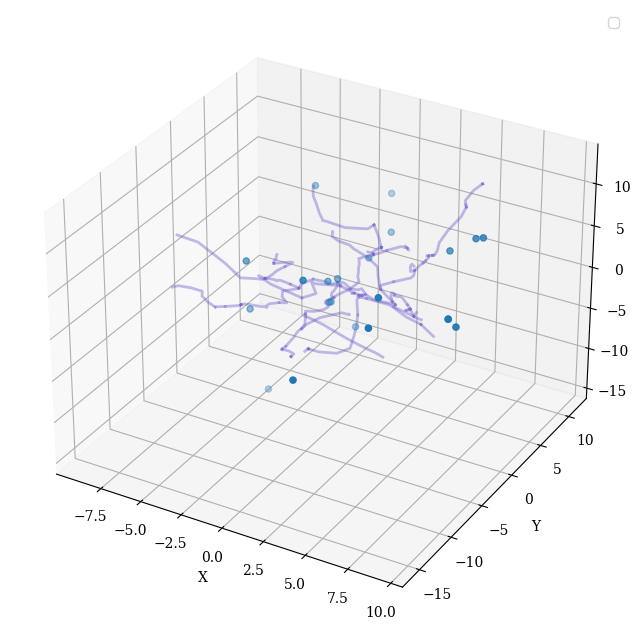

In [8]:
nfils_sample = nfils - 3200 #print only first few 100 filaments

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')
#ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils): #plots the filaments 
    fm.plot_dm_filament(fil_idx,filament_dm_dict,ax)
ax.set_xlabel('X') ; ax.set_ylabel('Y') ; ax.set_zlabel('Z')

x = gals[:,0] ; y = gals[:,1] ; z = gals[:,2]
ax.scatter3D(x,y,z)

ax.legend()
plt.show()

### Now start the actual iteration 

In [41]:
gals

array([[ -4.22034   ,  -3.01089   ,  -2.695605  ],
       [  1.080951  ,  -8.004285  ,   6.98871   ],
       [ -0.357204  ,  -0.59442   ,   1.20918   ],
       [ -0.4575405 ,   0.153831  ,  -1.805445  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [ -4.17039   ,  -0.4638315 , -14.338515  ],
       [ -0.592353  ,   0.1898595 ,  -1.971945  ],
       [  6.21606   , -11.34813   ,   6.61596   ],
       [ -3.66426   ,  -4.813905  ,   4.56852   ],
       [ -0.07599075,   0.2026965 ,   1.158858  ],
       [  0.14864985,   4.59897   ,   0.9373755 ],
       [  0.413109  ,   7.533075  ,   2.32167   ],
       [  7.882215  ,   0.908364  ,   9.793755  ],
       [ -0.1563405 ,   3.314205  ,  -6.81822   ],
       [ -3.72741   ,   6.00546   ,   6.72939   ],
       [ -0.9740715 ,  11.24265   ,   3.995145  ],
       [  8.285175  ,   0.971172  ,  10.06425   ],
       [  5.72283   ,  -8.566665  ,   7.961805  ],
       [  6.228225  ,   1.33317

In [42]:
gals[0]

array([-4.22034 , -3.01089 , -2.695605])

In [43]:
np.shape(gals)

(22, 3)

In [46]:
filpoints

425

In [45]:
filpoints[0]

array([-2.81356, -2.00726, -1.79707])

In [47]:
def distance(a,b):
    return np.linalg.norm(a-b)

In [61]:
test = np.arange(3,10,.7)
test

array([3. , 3.7, 4.4, 5.1, 5.8, 6.5, 7.2, 7.9, 8.6, 9.3])

In [62]:
np.argmin(test) #gives index of single lowest value in array

0

In [63]:
np.where(test == test.min()) #using numpy.where

(array([0]),)

In [67]:
A,B, *_ = np.partition(test,1)
print(A, B)

3.0 3.7


### Change method - after 7/13 meeting w/ Charlotte
- first filter out impossiblities: subtract galaxy point coordinates from segment coordinates and skip over/pass if difference is very large (>50 Mpc for example) and check against next difference. 
- THEN for each subsequent 2 filament points calculate all 3 distance values (for the 3 cases) and keep the smallest one of the 3. 
- THEN THEN do the same for the next set of points (this means including the second point fo the first set again, I think) and pass if the smallest of the 3 distances here is larger than the one previously saved. If smaller then replace. 
- Repeat this for every single galaxy point that you have. 

In [121]:
gals[0] 

array([-4.22034 , -3.01089 , -2.695605])

In [117]:
for element in gals[0]:
    if element < -3 or element ==0:
        print('yes') #just logical check for if/for statements of array elements

yes
yes


In [122]:
#ok now loop over all of the arrays 
N = 3
for i in range(N): 
    print(gals[i])

[-4.22034  -3.01089  -2.695605]
[ 1.080951 -8.004285  6.98871 ]
[-0.357204 -0.59442   1.20918 ]


In [125]:
N = len(filpoints)
N

425

In [ ]:
for i in range(len(gals)):
    for j in range(len(filpoints)):
        

In [126]:
gal1 = gals[0]
gal1

array([-4.22034 , -3.01089 , -2.695605])

In [147]:
filpoints

array([[-2.81356 , -2.00726 , -1.79707 ],
       [-3.34829 , -2.21085 , -2.10106 ],
       [-3.55129 , -2.20702 , -2.52764 ],
       ...,
       [ 0.287103,  6.25466 ,  1.18162 ],
       [ 0.284161,  6.26514 ,  1.18052 ],
       [ 0.28122 ,  6.27562 ,  1.17942 ]])

In [146]:
for i in range(len(filpoints)):
    A = gal1 - filpoints
print(A, "\n\n",np.shape(A))

[[-1.40678  -1.00363  -0.898535]
 [-0.87205  -0.80004  -0.594545]
 [-0.66905  -0.80387  -0.167965]
 ...
 [-4.507443 -9.26555  -3.877225]
 [-4.504501 -9.27603  -3.876125]
 [-4.50156  -9.28651  -3.875025]] 

 (425, 3)


In [141]:
gal1 - filpoints

array([[-1.40678 , -1.00363 , -0.898535],
       [-0.87205 , -0.80004 , -0.594545],
       [-0.66905 , -0.80387 , -0.167965],
       ...,
       [-4.507443, -9.26555 , -3.877225],
       [-4.504501, -9.27603 , -3.876125],
       [-4.50156 , -9.28651 , -3.875025]])

In [151]:
#ok so it looks like subtracting an array with one column from one with many will subtract the one column from all the 2nd array's columns 
gal1 - filpoints[-1] 

array([-4.50156 , -9.28651 , -3.875025])

In [154]:
#so this is all to check the closest distances for one galaxy 
filter_out = filpoints - gal1
np.amax(filter_out)

15.395105000000001

In [155]:
np.where(filter_out==15.395105000000001)

(array([402]), array([2]))

In [156]:
filter_out[402]

array([10.84516 ,  8.36337 , 15.395105])

#### I am stuck -- just do the calculation for one galaxy and each filament point, don't filter out **yet**

In [157]:
filpoints

array([[-2.81356 , -2.00726 , -1.79707 ],
       [-3.34829 , -2.21085 , -2.10106 ],
       [-3.55129 , -2.20702 , -2.52764 ],
       ...,
       [ 0.287103,  6.25466 ,  1.18162 ],
       [ 0.284161,  6.26514 ,  1.18052 ],
       [ 0.28122 ,  6.27562 ,  1.17942 ]])

In [158]:
# testing indexing 2 indices at a time, iterating 1 at a time
def special_read(data):
    last = None
    for curr in data:
        if last is not None:
            yield last, curr
        last = curr

In [185]:
for a, b in special_read(gals):
    A = np.vstack((a,b))
    print(A)

[[-4.22034  -3.01089  -2.695605]
 [ 1.080951 -8.004285  6.98871 ]]
[[ 1.080951 -8.004285  6.98871 ]
 [-0.357204 -0.59442   1.20918 ]]
[[-0.357204  -0.59442    1.20918  ]
 [-0.4575405  0.153831  -1.805445 ]]
[[-0.4575405  0.153831  -1.805445 ]
 [ 8.590275  -5.35833    4.965675 ]]
[[ 8.590275 -5.35833   4.965675]
 [ 8.590275 -5.35833   4.965675]]
[[  8.590275   -5.35833     4.965675 ]
 [ -4.17039    -0.4638315 -14.338515 ]]
[[ -4.17039    -0.4638315 -14.338515 ]
 [ -0.592353    0.1898595  -1.971945 ]]
[[ -0.592353    0.1898595  -1.971945 ]
 [  6.21606   -11.34813     6.61596  ]]
[[  6.21606  -11.34813    6.61596 ]
 [ -3.66426   -4.813905   4.56852 ]]
[[-3.66426    -4.813905    4.56852   ]
 [-0.07599075  0.2026965   1.158858  ]]
[[-0.07599075  0.2026965   1.158858  ]
 [ 0.14864985  4.59897     0.9373755 ]]
[[0.14864985 4.59897    0.9373755 ]
 [0.413109   7.533075   2.32167   ]]
[[0.413109 7.533075 2.32167 ]
 [7.882215 0.908364 9.793755]]
[[ 7.882215   0.908364   9.793755 ]
 [-0.1563405  3

In [160]:
gals

array([[ -4.22034   ,  -3.01089   ,  -2.695605  ],
       [  1.080951  ,  -8.004285  ,   6.98871   ],
       [ -0.357204  ,  -0.59442   ,   1.20918   ],
       [ -0.4575405 ,   0.153831  ,  -1.805445  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [ -4.17039   ,  -0.4638315 , -14.338515  ],
       [ -0.592353  ,   0.1898595 ,  -1.971945  ],
       [  6.21606   , -11.34813   ,   6.61596   ],
       [ -3.66426   ,  -4.813905  ,   4.56852   ],
       [ -0.07599075,   0.2026965 ,   1.158858  ],
       [  0.14864985,   4.59897   ,   0.9373755 ],
       [  0.413109  ,   7.533075  ,   2.32167   ],
       [  7.882215  ,   0.908364  ,   9.793755  ],
       [ -0.1563405 ,   3.314205  ,  -6.81822   ],
       [ -3.72741   ,   6.00546   ,   6.72939   ],
       [ -0.9740715 ,  11.24265   ,   3.995145  ],
       [  8.285175  ,   0.971172  ,  10.06425   ],
       [  5.72283   ,  -8.566665  ,   7.961805  ],
       [  6.228225  ,   1.33317

In [197]:
for a, b in special_read(gals):
    A = np.vstack((a,b))
    for i in range(len(A)):
        print(A[i][0,0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [201]:
for a, b in special_read(gals):
    A = np.array(a)
    B = np.array(b)
    print(A, B) # perfect - just do the math side by side

[-4.22034  -3.01089  -2.695605] [ 1.080951 -8.004285  6.98871 ]
[ 1.080951 -8.004285  6.98871 ] [-0.357204 -0.59442   1.20918 ]
[-0.357204 -0.59442   1.20918 ] [-0.4575405  0.153831  -1.805445 ]
[-0.4575405  0.153831  -1.805445 ] [ 8.590275 -5.35833   4.965675]
[ 8.590275 -5.35833   4.965675] [ 8.590275 -5.35833   4.965675]
[ 8.590275 -5.35833   4.965675] [ -4.17039    -0.4638315 -14.338515 ]
[ -4.17039    -0.4638315 -14.338515 ] [-0.592353   0.1898595 -1.971945 ]
[-0.592353   0.1898595 -1.971945 ] [  6.21606 -11.34813   6.61596]
[  6.21606 -11.34813   6.61596] [-3.66426  -4.813905  4.56852 ]
[-3.66426  -4.813905  4.56852 ] [-0.07599075  0.2026965   1.158858  ]
[-0.07599075  0.2026965   1.158858  ] [0.14864985 4.59897    0.9373755 ]
[0.14864985 4.59897    0.9373755 ] [0.413109 7.533075 2.32167 ]
[0.413109 7.533075 2.32167 ] [7.882215 0.908364 9.793755]
[7.882215 0.908364 9.793755] [-0.1563405  3.314205  -6.81822  ]
[-0.1563405  3.314205  -6.81822  ] [-3.72741  6.00546  6.72939]
[-3.727

In [ ]:
dsmall = np.zeros((np.shape(gals)))
dsmall.shape

In [274]:
dsmall = []
for a, b in special_read(gals):
    A = np.array(a) ; B = np.array(b) #here is where you can do math / distance checks 
    C = A - B
    dsmall.append(C)
dsmall = np.array(dsmall)
dsmall


array([[ -5.301291  ,   4.993395  ,  -9.684315  ],
       [  1.438155  ,  -7.409865  ,   5.77953   ],
       [  0.1003365 ,  -0.748251  ,   3.014625  ],
       [ -9.0478155 ,   5.512161  ,  -6.77112   ],
       [  0.        ,   0.        ,   0.        ],
       [ 12.760665  ,  -4.8944985 ,  19.30419   ],
       [ -3.578037  ,  -0.653691  , -12.36657   ],
       [ -6.808413  ,  11.5379895 ,  -8.587905  ],
       [  9.88032   ,  -6.534225  ,   2.04744   ],
       [ -3.58826925,  -5.0166015 ,   3.409662  ],
       [ -0.2246406 ,  -4.3962735 ,   0.2214825 ],
       [ -0.26445915,  -2.934105  ,  -1.3842945 ],
       [ -7.469106  ,   6.624711  ,  -7.472085  ],
       [  8.0385555 ,  -2.405841  ,  16.611975  ],
       [  3.5710695 ,  -2.691255  , -13.54761   ],
       [ -2.7533385 ,  -5.23719   ,   2.734245  ],
       [ -9.2592465 ,  10.271478  ,  -6.069105  ],
       [  2.562345  ,   9.537837  ,   2.102445  ],
       [ -0.505395  ,  -9.8998365 ,   0.764685  ],
       [  2.69124   ,  16.99287

In [275]:
np.shape(dsmall)

(21, 3)

In [ ]:
#this is now after finding the proper "distance" cases 
#so this resulting array would be all of the calculated distances 
#in retrospect -- I need an array of distances to pick the smallest


In [284]:
#so do example with basic distance formula and simple if loops 
#dsmall = np.zeros(len(gals)-1)
dsmall = []
for a, b in special_read(gals):
    A = np.array(a) ; B = np.array(b) #here is where you can do math / distance checks
    for i in range(len(dsmall)):
        C = np.linalg.norm(A-B)



dsmall = np.array(dsmall)
dsmall

TypeError: 'module' object is not callable

In [285]:
randomlist = [1,2,3,4]
randomlist

[1, 2, 3, 4]

In [287]:
randomarray = np.zeros(4)
randomarray

array([0., 0., 0., 0.])

In [289]:
randomarray = randoml

[1, 2, 3, 4]

In [313]:
A = [] ; B = []
for a, b in special_read(gals):
    A.append(a) ; B.append(b)
A = np.array(A) ; B = np.array(B)
 
A

array([[ -4.22034   ,  -3.01089   ,  -2.695605  ],
       [  1.080951  ,  -8.004285  ,   6.98871   ],
       [ -0.357204  ,  -0.59442   ,   1.20918   ],
       [ -0.4575405 ,   0.153831  ,  -1.805445  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [ -4.17039   ,  -0.4638315 , -14.338515  ],
       [ -0.592353  ,   0.1898595 ,  -1.971945  ],
       [  6.21606   , -11.34813   ,   6.61596   ],
       [ -3.66426   ,  -4.813905  ,   4.56852   ],
       [ -0.07599075,   0.2026965 ,   1.158858  ],
       [  0.14864985,   4.59897   ,   0.9373755 ],
       [  0.413109  ,   7.533075  ,   2.32167   ],
       [  7.882215  ,   0.908364  ,   9.793755  ],
       [ -0.1563405 ,   3.314205  ,  -6.81822   ],
       [ -3.72741   ,   6.00546   ,   6.72939   ],
       [ -0.9740715 ,  11.24265   ,   3.995145  ],
       [  8.285175  ,   0.971172  ,  10.06425   ],
       [  5.72283   ,  -8.566665  ,   7.961805  ],
       [  6.228225  ,   1.33317

In [320]:
dist = np.zeros(len(A))
for i in range(len(A)):
    dist[i] = np.linalg.norm(A[i]-B[i])
dist #voila !! 
#This would be the list of distances for one galaxy for each set of filament points - next step would be to pick lowest value 

array([12.11708038,  9.50670059,  3.10771795, 12.57358144,  0.        ,
       23.65253556, 12.89037293, 15.91325867, 12.02118256,  7.04753587,
        4.40757741,  3.25502413, 12.47022031, 18.61086131, 14.26650369,
        6.51806165, 15.1020178 , 10.09733735,  9.94217934, 17.95527485,
       11.49410021])

In [317]:
#compare above to 
np.linalg.norm(A[0]-B[0]) #voila

12.11708037903236

In [323]:
#REDO above with proper conditions - and check properly making unit vector
u1example = (A[0] * B[0]) / (np.linalg.norm(A[0]*B[0]))
u1example #this works 

array([-0.14750465,  0.77923722, -0.60912374])

In [325]:
A[0] * B[0] #checked using math -- works! 

array([ -4.56198074,  24.10002166, -18.83880162])

In [327]:
dist = np.zeros(len(A))
for i in range(len(A)):
      AB = A[i]*B[i] ; AG = A[i] * gal1[i] #does the AG make sense?
      u1 = (AB) / (np.linalg.norm(AB))
      if np.any(AG * u1 < 0): 
            d = np.linalg.norm(AG)
      

IndexError: index 3 is out of bounds for axis 0 with size 3

In [336]:
dist = np.zeros(len(A))
for i in range(len(A)):
      AB = A[i]*B[i] ; #AG = A[i] * gal1[i] #does the AG make sense?
      
      

In [334]:
A[0]*B[0] #in the if loop above AB[0] is the product of the first two segments 

array([ -4.56198074,  24.10002166, -18.83880162])

In [348]:
dist = np.zeros(len(A))
for i in range(len(A)):
      AB = A[i]*B[i] ; #AG = A[i] * gal1[i] #does the AG make sense?
      print(AB)

[ -4.56198074  24.10002166 -18.83880162]
[-0.38612002  4.75790709  8.45060836]
[ 0.1634353  -0.09144022 -2.18310799]
[-3.93039872 -0.82427726 -8.9652531 ]
[73.79282458 28.71170039 24.65792821]
[-35.82479696   2.48536224 -71.20040547]
[ 2.47034303 -0.08806282 28.27476296]
[ -3.68210179  -2.15455029 -13.04630924]
[-22.77726002  54.62881975  30.22514558]
[ 0.27844987 -0.97576169  5.29426595]
[-0.01129601  0.93219512  1.0862851 ]
[ 0.06140859 34.64438593  2.17627658]
[ 3.25621396  6.84277414 22.73786717]
[ -1.23230943   3.01050451 -66.77597622]
[  0.58274514  19.90332556 -45.88246149]
[ 3.63076385 67.51728487 26.88488881]
[-8.07035284 10.91854689 40.20813807]
[47.41464805 -8.31970518 80.12959597]
[ 35.64307288 -11.42083363  57.302066  ]
[ 22.0291384  -20.87706574  14.8250596 ]
[33.04988848 97.14197361 10.41181985]


In [345]:
AB * u1

array([  2.46517931,  -4.05393573, -10.37372003])

In [344]:
if np.any(AB * u1) > 0:
    print('yes')

yes


In [360]:
dist = np.zeros(len(A))
for i in range(len(A)):
      AB = A[i]*B[i] ; #AG = A[i] * gal1[i] #does the AG make sense?
      print(AB)

[ -4.56198074  24.10002166 -18.83880162]
[-0.38612002  4.75790709  8.45060836]
[ 0.1634353  -0.09144022 -2.18310799]
[-3.93039872 -0.82427726 -8.9652531 ]
[73.79282458 28.71170039 24.65792821]
[-35.82479696   2.48536224 -71.20040547]
[ 2.47034303 -0.08806282 28.27476296]
[ -3.68210179  -2.15455029 -13.04630924]
[-22.77726002  54.62881975  30.22514558]
[ 0.27844987 -0.97576169  5.29426595]
[-0.01129601  0.93219512  1.0862851 ]
[ 0.06140859 34.64438593  2.17627658]
[ 3.25621396  6.84277414 22.73786717]
[ -1.23230943   3.01050451 -66.77597622]
[  0.58274514  19.90332556 -45.88246149]
[ 3.63076385 67.51728487 26.88488881]
[-8.07035284 10.91854689 40.20813807]
[47.41464805 -8.31970518 80.12959597]
[ 35.64307288 -11.42083363  57.302066  ]
[ 22.0291384  -20.87706574  14.8250596 ]
[33.04988848 97.14197361 10.41181985]


In [363]:
filpoints

array([[-2.81356 , -2.00726 , -1.79707 ],
       [-3.34829 , -2.21085 , -2.10106 ],
       [-3.55129 , -2.20702 , -2.52764 ],
       ...,
       [ 0.287103,  6.25466 ,  1.18162 ],
       [ 0.284161,  6.26514 ,  1.18052 ],
       [ 0.28122 ,  6.27562 ,  1.17942 ]])

In [364]:
gal1

array([-4.22034 , -3.01089 , -2.695605])

In [396]:
#Tony's way 
N = 424
for i in range(N): 
    a = np.linalg.norm(gal1 - filpoints[i])
    b = np.linalg.norm(gal1 - filpoints[i+1])
    c = np.linalg.norm(filpoints[i] - filpoints[i+1])
    print(a,"\n", b)

1.9477341429273658 
 1.3243938089273144
1.3243938089273144 
 1.059267256467885
1.059267256467885 
 1.1566919527795634
1.1566919527795634 
 1.1478146088219126
1.1478146088219126 
 0.8249156530973334
0.8249156530973334 
 0.47100183526712486
0.47100183526712486 
 0.5315058101516861
0.5315058101516861 
 0.5881183614928205
0.5881183614928205 
 0.6028525164789478
0.6028525164789478 
 1.9477341429273658
1.9477341429273658 
 2.370418979806102
2.370418979806102 
 2.564960076426337
2.564960076426337 
 3.162081756069726
3.162081756069726 
 3.5983077765797202
3.5983077765797202 
 3.9717549504504728
3.9717549504504728 
 4.013398487491617
4.013398487491617 
 7.48776716878923
7.48776716878923 
 8.413964380180666
8.413964380180666 
 9.020138854005852
9.020138854005852 
 9.160377621785086
9.160377621785086 
 9.573141328964335
9.573141328964335 
 10.378498239770773
10.378498239770773 
 10.894139964243392
10.894139964243392 
 10.89488631619096
10.89488631619096 
 7.48776716878923
7.48776716878923 
 6.605

In [376]:
np.linalg.norm(gal1 - filpoints[0])

1.9477341429273658

In [399]:
#Tony's way 
N = len(filpoints)
for i in range(N): 
    a = np.linalg.norm(filpoints[i]-gal1)
    b = np.linalg.norm(filpoints[i+1]-gal1)
    u = np.linalg.norm(filpoints[i]-filpoints[i+1])
    unitv = filpoints[i]/u[i]
    print(unitv)

IndexError: invalid index to scalar variable.

In [411]:
#Tony's way 
N = len(filpoints)
for i in range(N-1): 
    A = filpoints[i]
    B = filpoints[i+1]
    AB = B - A ; AG = gal1 - A
    u = (AB) / (np.linalg.norm(AB))
    if np.all(AG * u < 0):
        print(AG*u)
    

[-1.2258348  -0.47728608 -0.10837006]
[-1.20700837 -0.59098751 -0.58044439]
[-1.45214171 -0.81886479 -0.80502141]
[-1.48719233 -0.42012683 -2.03382078]
[-4.46639962 -0.2932521  -3.00527051]
[-4.40844789 -0.56493044 -3.93783157]
[-4.95191865 -0.58529484 -4.27964249]
[-1.10827978 -0.25531822 -2.54212462]
[-0.70995158 -2.96353271 -0.43268182]
[-1.74049002 -1.01751327 -0.71617066]
[-2.05446691 -0.27626076 -4.45369256]
[-3.53937949 -0.42640186 -2.36915975]
[-7.89981953 -0.17002105 -3.0912522 ]
[-0.70851869 -1.64021003 -0.44806725]
[-0.65342345 -1.42852464 -2.81661451]
[-0.65098717 -1.11640736 -4.74488101]
[-2.02026999 -0.57624907 -1.01528788]
[-1.14217381 -0.23127994 -0.0357111 ]
[-0.36975217 -0.11382414 -4.83853825]
[-0.16960697 -0.14010592 -7.38231033]
[-0.58004006 -0.34675324 -7.12266374]
[-1.50951761 -0.79009266 -3.41099251]
[-0.23983833 -0.12442602 -8.00781744]
[-0.2332851  -0.03163596 -8.36081649]
[-0.87673583 -4.37477562 -0.61057625]
[-1.71157179 -6.12609049 -0.55946803]
[-2.1147296 

/var/folders/nd/klv0c43973gc4llkjgc9276m0000gp/T/ipykernel_60975/3515939271.py:7: RuntimeWarning: invalid value encountered in divide
  u = (AB) / (np.linalg.norm(AB))


In [462]:
#Tony's way 
N = len(filpoints)
A = np.empty((N-1,3)) ; B = np.empty((N-1,3)) ; AB = np.empty((N-1,3)) ; AG = np.empty((N-1,3)) ; u = np.empty((N-1,3))

for i in range(N-1): 
    A[i] = filpoints[i]
    B[i] = filpoints[i+1]
    AB[i] = B[i] - A[i] ; AG[i] = gal1 - A[i]
    u[i] = AB[i] / np.linalg.norm(AB[i])
AG

/var/folders/nd/klv0c43973gc4llkjgc9276m0000gp/T/ipykernel_60975/761654316.py:9: RuntimeWarning: invalid value encountered in divide
  u[i] = AB[i] / np.linalg.norm(AB[i])


array([[ -1.40678 ,  -1.00363 ,  -0.898535],
       [ -0.87205 ,  -0.80004 ,  -0.594545],
       [ -0.66905 ,  -0.80387 ,  -0.167965],
       ...,
       [-10.39946 ,   1.19332 ,  -5.836245],
       [ -4.507443,  -9.26555 ,  -3.877225],
       [ -4.504501,  -9.27603 ,  -3.876125]])

In [463]:
gal1 - filpoints[1] # check that AG calculated right

array([-0.87205 , -0.80004 , -0.594545])

In [464]:
u #check unit vector for AB makes sense

array([[-0.82530776, -0.31422289, -0.46918128],
       [-0.42968938,  0.00810695, -0.90294037],
       [ 0.01598683,  0.50657554, -0.86204735],
       ...,
       [-0.48441642,  0.85988353, -0.16106224],
       [-0.26890772,  0.95790379, -0.10054334],
       [-0.26882293,  0.95792733, -0.10054581]])

In [465]:
(filpoints[2] - filpoints[1]) / np.linalg.norm(filpoints[2]-filpoints[[1]]) # voila 

array([-0.42968938,  0.00810695, -0.90294037])

In [428]:
N = len(filpoints) - 1 # this was check for work above - to see how to set up zeros array properly
A = np.zeros((N-1,3))
A.shape

(423, 3)

In [499]:
#ok so we have this first part -- getting unit vectors and whatnot -- DO NOT do a nested loop but continue to check 
N = len(filpoints)
A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))

for i in range(N-1): 
    A[i] = filpoints[i]
    B[i] = filpoints[i+1]
    AB[i] = B[i] - A[i] ; AG[i] = gal1 - A[i]
    u[i] = AB[i] / np.linalg.norm(AB[i]) #now we have arrays of unit vectors and AB and AG
#now do if statements to calculate the right distances 
distances = np.zeros((N-1)) #this is array that will have saved all the distances 
#Logical checks below -- should be in order!! Refer to notes 
for i in range(len(A)):
    if np.dot(AG[i], u[i]) < 0:
        distances[i] = np.linalg.norm(gal1-A[i])
    elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]):
        distances[i] = np.linalg.norm(gal1 - B[i])
    elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): 
        #term1 = A[i] - B[i] ; term2 = A[i] - gal1 
        #num = np.cross(term1, term2) ; denom = np.linalg.norm(gal1 - B[i])
        #distances[i] = num / denom
        #was this done right?? The magnitude of cross products of BA and GA???
        distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gal1)))) / (np.linalg.norm(gal1-B[i]))
distances

/var/folders/nd/klv0c43973gc4llkjgc9276m0000gp/T/ipykernel_60975/4021817465.py:9: RuntimeWarning: invalid value encountered in divide
  u[i] = AB[i] / np.linalg.norm(AB[i]) #now we have arrays of unit vectors and AB and AG


array([ 1.32439381,  1.05926726,  1.05926726,  1.14781461,  0.82491565,
        0.47100184,  0.32027637,  0.53150581,  0.58811836,  0.5201615 ,
        1.94773414,  2.37041898,  2.56496008,  3.16208176,  3.59830778,
        3.97175495,  4.01339849,  7.48776717,  8.41396438,  9.02013885,
        9.16037762,  9.57314133, 10.37849824, 10.89413996,  7.48776717,
        6.60591952,  6.07756436,  5.71667364,  5.40790539,  5.33425309,
        5.33425309, 10.89488632, 11.00547865, 11.21347339, 11.30802463,
        5.33425309,  5.3216478 ,  3.2301988 ,  5.52210462,  5.88484158,
        5.91237787,  6.08513174,  6.19228689,  5.52210462,  4.58410934,
        4.06225181,  4.06225181,  6.23295942,  6.18957189,  6.11483581,
        5.89788745,  5.60631761,  5.45833405,  5.29777417,  5.19682758,
        5.19682758,  5.21825168,  5.26619392,  0.        ,  5.22007652,
        5.15486373,  5.12979552,  5.12979552,  4.06225181,  4.01339849,
        4.01339849, 10.66716204, 10.46840421, 10.27346939, 10.16

In [494]:
#check above 
np.dot(AG[0], u[0]) #not less than 0 (case2)

1.8979657748258376

In [496]:
np.linalg.norm(AB[0]) #checking if AG dot u1 > ||AB||: it is!!!

0.6479158750177374

In [500]:
#therefore check case 3
np.linalg.norm(gal1-B[0])

1.3243938089273144

In [497]:
#Check fancy distance
num = np.cross((A[0]-B[0]), A[0]-gal1) 
np.linalg.norm(num) / np.linalg.norm(gal1-B[0]) 

0.2140256752118747

In [480]:
AB[0]

array([-0.53473, -0.20359, -0.30399])

In [481]:
np.linalg.norm(AB[0])

0.6479158750177374

In [486]:
np.linalg.norm(AB[0] - gal1)

5.21387348046776

In [503]:
#ok so we have this first part -- getting unit vectors and whatnot -- DO NOT do a nested loop but continue to check 
N = len(filpoints)
A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))

for i in range(N-1): 
    A[i] = filpoints[i]
    B[i] = filpoints[i+1]
    AB[i] = B[i] - A[i] ; AG[i] = gal1 - A[i]
    u[i] = AB[i] / np.linalg.norm(AB[i]) #now we have arrays of unit vectors and AB and AG
#now do if statements to calculate the right distances 
distances = np.zeros((N-1)) #this is array that will have saved all the distances 
#Logical checks below -- should be in order!! Refer to notes 
for i in range(len(A)):
    if np.dot(AG[i], u[i]) < 0: #case 1 
        distances[i] = np.linalg.norm(gal1-A[i])
    elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
        distances[i] = np.linalg.norm(gal1 - B[i])
    elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
        #was this done right?? The magnitude of cross products of BA and GA???
        distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gal1)))) / (np.linalg.norm(gal1-B[i]))
closest_distance = np.min(distances)
closest_distance #closest distance is zero?? 

/var/folders/nd/klv0c43973gc4llkjgc9276m0000gp/T/ipykernel_60975/2763071815.py:9: RuntimeWarning: invalid value encountered in divide
  u[i] = AB[i] / np.linalg.norm(AB[i]) #now we have arrays of unit vectors and AB and AG


0.0

In [521]:
filpoints

array([[-2.81356 , -2.00726 , -1.79707 ],
       [-3.34829 , -2.21085 , -2.10106 ],
       [-3.55129 , -2.20702 , -2.52764 ],
       ...,
       [ 0.287103,  6.25466 ,  1.18162 ],
       [ 0.284161,  6.26514 ,  1.18052 ],
       [ 0.28122 ,  6.27562 ,  1.17942 ]])

In [522]:
testarray = np.array((-2.81356 , -2.00726 , -1.79707))
testarray

array([-2.81356, -2.00726, -1.79707])

In [523]:
for i in range(len(filpoints)):
    if np.all(filpoints[i] == testarray):
        print('yes') #this proves that there are no galaxies exactly on the filament -- something went wrong with distance

yes
yes


In [524]:
distances

array([ 1.32439381,  1.05926726,  1.05926726,  1.14781461,  0.82491565,
        0.47100184,  0.32027637,  0.53150581,  0.58811836,  0.5201615 ,
        1.94773414,  2.37041898,  2.56496008,  3.16208176,  3.59830778,
        3.97175495,  4.01339849,  7.48776717,  8.41396438,  9.02013885,
        9.16037762,  9.57314133, 10.37849824, 10.89413996,  7.48776717,
        6.60591952,  6.07756436,  5.71667364,  5.40790539,  5.33425309,
        5.33425309, 10.89488632, 11.00547865, 11.21347339, 11.30802463,
        5.33425309,  5.3216478 ,  3.2301988 ,  5.52210462,  5.88484158,
        5.91237787,  6.08513174,  6.19228689,  5.52210462,  4.58410934,
        4.06225181,  4.06225181,  6.23295942,  6.18957189,  6.11483581,
        5.89788745,  5.60631761,  5.45833405,  5.29777417,  5.19682758,
        5.19682758,  5.21825168,  5.26619392,  0.        ,  5.22007652,
        5.15486373,  5.12979552,  5.12979552,  4.06225181,  4.01339849,
        4.01339849, 10.66716204, 10.46840421, 10.27346939, 10.16

In [525]:
np.where(distances==0)

(array([ 58, 120, 127, 171, 206, 209, 237, 244, 254, 305, 314, 325, 329,
        336, 399]),)

In [526]:
distances[58]

0.0

In [527]:
np.dot(AG[58], u[58]) #interesting

nan

In [534]:
u[58] #why is this???

array([nan, nan, nan])

In [535]:
A[58]

array([-0.264355,  0.122917, -1.14856 ])

In [541]:
B[58] #AH okay A and B were the same -- does this mean AB is just A or B? Yes, right?

array([-0.264355,  0.122917, -1.14856 ])

In [574]:
#unit vector for A[58] and B[58]
U = A[58] / np.linalg.norm(A[58])
np.dot(AG[58], U)

-8.812260928607568

In [576]:
np.linalg.norm(gal1-A[58]) #was just checking to see that this does not end up being smallest distance

5.278627839268364

In [1]:
#need to write an if statement for unit vectors?
N = len(filpoints)
A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))

for i in range(N-1): 
    A[i] = filpoints[i]
    B[i] = filpoints[i+1]
    AB[i] = B[i] - A[i] ; AG[i] = gal1 - A[i]
    #have to account for A and B being the same 
    if np.all(AB[i] != 0):
        u[i] = AB[i] / np.linalg.norm(AB[i])
    elif np.all(AB[i] == 0):
        u[i] = A[i] / np.linalg.norm(A[i])
#if statements to calculate the right distances 
distances = np.zeros((N-1)) #this is array that will have saved all the distances 
#Logical checks below -- should be in order!! Refer to notes 
for i in range(len(A)):
    if np.dot(AG[i], u[i]) < 0: #case 1 
        distances[i] = np.linalg.norm(gal1-A[i])
    elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
        distances[i] = np.linalg.norm(gal1 - B[i])
    elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
        #was this done right?? The magnitude of cross products of BA and GA???
        distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gal1)))) / (np.linalg.norm(gal1-B[i]))
closest_distance = np.min(distances)
closest_distance #closest distance in Mpc for 

NameError: name 'filpoints' is not defined

In [543]:
distances

array([ 1.32439381,  1.05926726,  1.05926726,  1.14781461,  0.82491565,
        0.47100184,  0.32027637,  0.53150581,  0.58811836,  0.5201615 ,
        1.94773414,  2.37041898,  2.56496008,  3.16208176,  3.59830778,
        3.97175495,  4.01339849,  7.48776717,  8.41396438,  9.02013885,
        9.16037762,  9.57314133, 10.37849824, 10.89413996,  7.48776717,
        6.60591952,  6.07756436,  5.71667364,  5.40790539,  5.33425309,
        5.33425309, 10.89488632, 11.00547865, 11.21347339, 11.30802463,
        5.33425309,  5.3216478 ,  3.2301988 ,  5.52210462,  5.88484158,
        5.91237787,  6.08513174,  6.19228689,  5.52210462,  4.58410934,
        4.06225181,  4.06225181,  6.23295942,  6.18957189,  6.11483581,
        5.89788745,  5.60631761,  5.45833405,  5.29777417,  5.19682758,
        5.19682758,  5.21825168,  5.26619392,  5.27862784,  5.22007652,
        5.15486373,  5.12979552,  5.12979552,  4.06225181,  4.01339849,
        4.01339849, 10.66716204, 10.46840421, 10.27346939, 10.16

#### NOW OPTIMIZE TO DO THIS FOR MANY GALAXIES

In [546]:
gals

array([[ -4.22034   ,  -3.01089   ,  -2.695605  ],
       [  1.080951  ,  -8.004285  ,   6.98871   ],
       [ -0.357204  ,  -0.59442   ,   1.20918   ],
       [ -0.4575405 ,   0.153831  ,  -1.805445  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [  8.590275  ,  -5.35833   ,   4.965675  ],
       [ -4.17039   ,  -0.4638315 , -14.338515  ],
       [ -0.592353  ,   0.1898595 ,  -1.971945  ],
       [  6.21606   , -11.34813   ,   6.61596   ],
       [ -3.66426   ,  -4.813905  ,   4.56852   ],
       [ -0.07599075,   0.2026965 ,   1.158858  ],
       [  0.14864985,   4.59897   ,   0.9373755 ],
       [  0.413109  ,   7.533075  ,   2.32167   ],
       [  7.882215  ,   0.908364  ,   9.793755  ],
       [ -0.1563405 ,   3.314205  ,  -6.81822   ],
       [ -3.72741   ,   6.00546   ,   6.72939   ],
       [ -0.9740715 ,  11.24265   ,   3.995145  ],
       [  8.285175  ,   0.971172  ,  10.06425   ],
       [  5.72283   ,  -8.566665  ,   7.961805  ],
       [  6.228225  ,   1.33317

In [555]:
#this will have to be a nested loop 
gal_distances = np.zeros(len(gals))

for k in range(len(gals)):
    N = len(filpoints)
    A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))
    for i in range(N-1):
        A[i] = filpoints[i] ; B[i] = filpoints[i+1]
        AB[i] = B[i] - A[i] ; AG[i] = gals[k] - A[i]
        #have to account for A and B being the same 
        if np.all(AB[i] != 0):
            u[i] = AB[i] / np.linalg.norm(AB[i])
        elif np.all(AB[i] == 0):
            u[i] = A[i] / np.linalg.norm(A[i])
        #if statements to check the right distances
    distances = np.zeros((N-1))
        #Logical case check below
    for i in range(len(A)):
        if np.dot(AG[i], u[i]) < 0: #case 1 
            distances[i] = np.linalg.norm(gals[k]-A[i])
        elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
            distances[i] = np.linalg.norm(gals[k] - B[i])
        elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
            #was this done right?? The magnitude of cross products of BA and GA???
            distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gals[k])))) / (np.linalg.norm(gals[k]-B[i]))
    gal_distances[k] = np.min(distances)
gal_distances # AYOOOOO this works -- recall this is fake data so apply this now to 

array([0.15282606, 0.42952041, 0.08395011, 0.27581088, 0.7550957 ,
       0.7550957 , 1.58170923, 0.25593842, 0.555516  , 0.53659232,
       0.14650821, 0.10548462, 0.12099037, 0.44083507, 0.46977949,
       0.11140615, 0.05278385, 0.0945287 , 0.25149928, 0.1376251 ,
       0.82505107, 0.65289083])

In [567]:
def galaxyfilamentdistance(gals, filpoints):
     '''Finds the closest distances between an array of galaxies
        and array of filament points. '''
     gal_distances = np.zeros(len(gals))
     for k in range(len(gals)):
         N = len(filpoints)
         A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))
         for i in range(N-1):
            A[i] = filpoints[i] ; B[i] = filpoints[i+1]
            AB[i] = B[i] - A[i] ; AG[i] = gals[k] - A[i]
            #have to account for A and B being the same 
            if np.all(AB[i] != 0):
                  u[i] = AB[i] / np.linalg.norm(AB[i])
            elif np.all(AB[i] == 0):
                  u[i] = A[i] / np.linalg.norm(A[i])
            #if statements to check the right distances
         distances = np.zeros((N-1))
            #Logical case check below
         for i in range(len(A)):
            if np.dot(AG[i], u[i]) < 0: #case 1 
                  distances[i] = np.linalg.norm(gals[k]-A[i])
            elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
                  distances[i] = np.linalg.norm(gals[k] - B[i])
            elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
                  #was this done right?? The magnitude of cross products of BA and GA???
                  distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gals[k])))) / (np.linalg.norm(gals[k]-B[i]))
         gal_distances[k] = np.min(distances)
      
     return gal_distances

In [568]:
galaxyfilamentdistance(gals,filpoints)

array([0.15282606, 0.42952041, 0.08395011, 0.27581088, 0.7550957 ,
       0.7550957 , 1.58170923, 0.25593842, 0.555516  , 0.53659232,
       0.14650821, 0.10548462, 0.12099037, 0.44083507, 0.46977949,
       0.11140615, 0.05278385, 0.0945287 , 0.25149928, 0.1376251 ,
       0.82505107, 0.65289083])

In [613]:
filpoints

array([[-2.81356 , -2.00726 , -1.79707 ],
       [-3.34829 , -2.21085 , -2.10106 ],
       [-3.55129 , -2.20702 , -2.52764 ],
       ...,
       [ 0.287103,  6.25466 ,  1.18162 ],
       [ 0.284161,  6.26514 ,  1.18052 ],
       [ 0.28122 ,  6.27562 ,  1.17942 ]])

In [577]:
#2nd take -- Ari suggested skipping if AB (B-A) is zero 
gal_distances = np.zeros(len(gals))

for k in range(len(gals)):
    N = len(filpoints)
    A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))
    for i in range(N-1):
        A[i] = filpoints[i] ; B[i] = filpoints[i+1]
        AB[i] = B[i] - A[i] ; AG[i] = gals[k] - A[i]
        #have to account for A and B being the same 
        if np.all(AB[i] != 0):
            u[i] = AB[i] / np.linalg.norm(AB[i])
        elif np.all(AB[i] == 0):
            u[i] = 50.0
        #if statements to check the right distances
    distances = np.zeros((N-1))
        #Logical case check below
    for i in range(len(A)):
        if np.dot(AG[i], u[i]) < 0: #case 1 
            distances[i] = np.linalg.norm(gals[k]-A[i])
        elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
            distances[i] = np.linalg.norm(gals[k] - B[i])
        elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
            #was this done right?? The magnitude of cross products of BA and GA???
            distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gals[k])))) / (np.linalg.norm(gals[k]-B[i]))
    gal_distances[k] = np.min(distances)
gal_distances # AYOOOOO this works -- recall this is fake data so apply this now to 

array([0.15282606, 0.42952041, 0.08395011, 0.27581088, 0.7550957 ,
       0.7550957 , 1.58170923, 0.25593842, 0.555516  , 0.53659232,
       0.14650821, 0.10548462, 0.12099037, 0.44083507, 0.46977949,
       0.11140615, 0.05278385, 0.0945287 , 0.25149928, 0.1376251 ,
       0.82505107, 0.65289083])

In [598]:
# NEW ATTEMPT -- OPTIMIZE TO MAKE THIS PROCESS FASTER 
gal_distances = np.zeros(len(gals))

for k in range(len(gals)):
    N = len(filpoints)
    A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))
    distances = np.zeros((N-1))
    for i in range(N-1):
        A[i] = filpoints[i] ; B[i] = filpoints[i+1] ; AG[i] = gals[k] - A[i]

        #NEW (OPTIMIZATION) -- if statements to check AG
        if np.any(AG[i] > 10):
            distances[i] = 100.0
            continue
        else:
            AB[i] = B[i] - A[i] 
        #have to account for A and B being the same 
        if np.all(AB[i] != 0): #changed to elif
            u[i] = AB[i] / np.linalg.norm(AB[i])
        elif np.all(AB[i] == 0):
            u[i] = A[i] / np.linalg.norm(A[i])

        #if statements to check the right distances
        #Logical case check below
    for i in range(len(A)):
        if np.dot(AG[i], u[i]) < 0: #case 1 
            distances[i] = np.linalg.norm(gals[k]-A[i])
        elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
            distances[i] = np.linalg.norm(gals[k] - B[i])
        elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
            #was this done right?? The magnitude of cross products of BA and GA???
            distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gals[k])))) / (np.linalg.norm(gals[k]-B[i]))
    gal_distances[k] = np.min(distances)
gal_distances # AYOOOOO this works -- recall this is fake data so apply this now to 

array([0.15282606, 0.42952041, 0.08395011, 0.27581088, 1.05753675,
       1.05753675, 1.58170923, 0.25593842, 0.555516  , 0.53659232,
       0.14650821, 0.10548462, 0.12099037, 0.44083507, 0.46977949,
       0.11140615, 0.84282659, 0.0945287 , 0.25149928, 0.1376251 ,
       0.82505107, 0.65289083])

In [599]:
for i in AG:
    if np.any(i > 15):
        print(i)

[15.451475 -2.42207   8.049685]
[15.437825 -2.40677   8.041225]
[17.260375 -0.42475   5.34304 ]
[17.111475 -0.94837   5.433888]
[16.583125 -1.58431   5.814508]
[15.979175 -1.83064   6.054685]
[16.063915 -1.97378   6.785585]
[15.860165 -2.32037   7.615515]
[15.617005 -2.39828   7.902675]
[15.437825 -2.40677   8.041225]
[18.326665 -3.70849   1.752025]
[17.016355 -3.73635   1.921665]


In [612]:
# NEW ATTEMPT -- TRY AGAIN
gal_distances = np.zeros(len(gals))

for k in range(len(gals)):
    N = len(filpoints)
    A = np.zeros((N-1,3)) ; B = np.zeros((N-1,3)) ; AB = np.zeros((N-1,3)) ; AG = np.zeros((N-1,3)) ; u = np.zeros((N-1,3))
    distances = np.zeros((N-1))
    for i in range(N-1):
        A[i] = filpoints[i] ; B[i] = filpoints[i+1] ; AG[i] = gals[k] - A[i]

        #NEW (OPTIMIZATION) -- if statements to check AG
        if np.any(AG[i] > 10):
            distances[i] = 0
            continue
        else:
            AB[i] = B[i] - A[i] 
            #have to account for A and B being the same 
            if np.all(AB[i] != 0): #changed to elif
                u[i] = AB[i] / np.linalg.norm(AB[i])
            elif np.all(AB[i] == 0):
                u[i] = A[i] / np.linalg.norm(A[i])

            #if statements to check the right distances
            #Logical case check below
            if np.dot(AG[i], u[i]) < 0: #case 1 
                distances[i] = np.linalg.norm(gals[k]-A[i])
            elif np.dot(AG[i],u[i]) > np.linalg.norm(AB[i]): #case 2
                distances[i] = np.linalg.norm(gals[k] - B[i])
            elif np.dot(AG[i], u[i]) < np.linalg.norm(AB[i]): #case 3
                #was this done right?? The magnitude of cross products of BA and GA???
                distances[i] = np.linalg.norm((np.cross((A[i]-B[i]), (A[i]-gals[k])))) / (np.linalg.norm(gals[k]-B[i]))
        gal_distances[k] = np.min(distances)
gal_distances # AYOOOOO this works -- recall this is fake data so apply this now to 

array([0.15282606, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])